In [358]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import pandas as pd
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
     "font.sans-serif": ["cmss"],   

    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \renewcommand{\familydefault}{\sfdefault}
    """
})
apical = 8*np.pi/12

d1 = 2/3*np.cos(apical/2)
d2 = np.sqrt((1/3*np.cos(apical/2))**2 + np.sin(apical/2)**2)
theta = np.pi/2 + np.atan2(np.cos(apical/2)/3, np.sin(apical/2))

In [359]:

min_dist = 2*(np.cos(apical/2)/3+0.5)
max_dist = 2*(np.sqrt((1/3*np.cos(apical/2))**2 + np.sin(apical/2)**2)+0.5)
area = np.pi*(max_dist**2 - min_dist**2)
L = max_dist*2
L2 = L/2

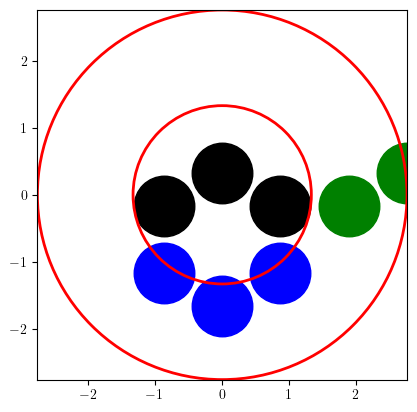

In [360]:
from matplotlib.patches import Circle
ss = 1900
x_fixed = [0, -np.sin(apical/2), np.sin(apical/2)]
y_fixed = [2/3*np.cos(apical/2), -1/3*np.cos(apical/2), -1/3*np.cos(apical/2)]

yflip = [-2/3*np.cos(apical/2), 1/3*np.cos(apical/2), 1/3*np.cos(apical/2)]

plt.scatter(x_fixed, y_fixed, s = ss, color = 'k')
plt.scatter(x_fixed, yflip-min_dist, s = ss, color = 'b')
plt.scatter(x_fixed+max_dist, y_fixed, s = ss, color = 'g')


plt.xlim(-L2, L2)
plt.ylim(-L2, L2)


ax = plt.gca()
ax.set_aspect('equal')

min = Circle((0, 0), radius=min_dist, facecolor='none', edgecolor='red', linewidth=2)
max =  Circle((0, 0), radius=max_dist, facecolor='none', edgecolor='red', linewidth=2)
ax.add_patch(min)
ax.add_patch(max)



In [155]:
get_positions()
# (XXX[0]-x_fixed[2])**2 + (YYY[0]-y_fixed[2])**2 < 1.0
y[0]

np.float64(-1.4263563061209548)

In [361]:
###### DEFINE VARIABLES
shots = 1000000
num_angles =500
angles = np.linspace(0, np.pi, num_angles) 
areas = np.zeros(num_angles)

###### MIN AND MAX DISTANCES
min_dist = 2*(np.cos(apical/2)/3+0.5)
max_dist = 2*(np.sqrt((1/3*np.cos(apical/2))**2 + np.sin(apical/2)**2) + 0.5)

###### DEFINE VARIABLES
shot_x = 0
shot_y = 0
phi = 0
XXX = np.zeros(3)
YYY = np.zeros(3)

def get_positions(): 
    XXX[0] = shot_x + d1*np.sin(phi)
    XXX[1] = shot_x + d2*np.sin(phi+theta)
    XXX[2] = shot_x + d2*np.sin(phi-theta)
    YYY[0] = shot_y + d1*np.cos(phi)
    YYY[1] = shot_y + d2*np.cos(phi+theta)
    YYY[2] = shot_y + d2*np.cos(phi-theta)


In [286]:
### Prepare shots for annulus
def get_shots():
    empty = np.zeros(shots)
    ang = np.zeros(shots)
    for i in range(shots):
        rand = np.random.uniform(low=0.0, high= 1.0)
        empty[i] = np.sqrt(rand*(max_dist**2 - min_dist**2) + min_dist**2)
        ang[i] = np.random.uniform(low = 0.0, high = 2*np.pi)

    x = empty*np.sin(ang)
    y = empty*np.cos(ang)

    return x,y   

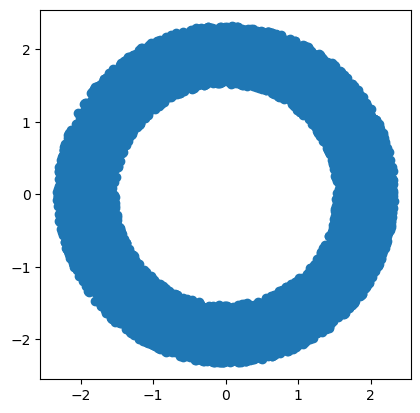

In [124]:
x,y = get_shots()
plt.scatter(x,y)
ax = plt.gca()
ax.set_aspect('equal')

In [156]:
########## Using Annulus method

areas = np.zeros(num_angles)

def overlap_annulus():
    for i in range(3):
        for j in range(3):
            if(((XXX[i] - x_fixed[j])**2+(YYY[i] - y_fixed[j])**2) <1.0):
                return True
    return False
                   

for i in range(num_angles):
    x,y = get_shots()
    for s in range(shots):
        shot_x = x[s]
        shot_y = y[s]
        get_positions()
        if(overlap_annulus()):
            areas[i]+=1

In [362]:
########## Using Square Method

areas = np.zeros(num_angles)

def overlap():
    if((shot_x**2 + shot_y**2)< min_dist**2): 
        return True
    if((shot_x**2 + shot_y**2) > max_dist**2):
        return False
    for i in range(3):
        for j in range(3):
            if((XXX[i] - x_fixed[j])**2+(YYY[i] - y_fixed[j])**2 <1.0):
                return True
    return False
                   
for i in range(num_angles):
    phi = angles[i]
    for n in range(shots): 
        shot_x = np.random.uniform(low=-L2, high=L2)
        shot_y = np.random.uniform(low=-L2, high=L2)
        get_positions()
        if(overlap()):
            areas[i]+=1

In [353]:
def rollingmean(data, window):
    window_size = window
    kernel = np.ones(window_size) / window_size
    rolling_mean_convolve = np.convolve(data, kernel, mode='valid')
    return rolling_mean_convolve

In [363]:
### Reflecting over axis (since symmetric)
areas_ = np.flip(areas)
arr = np.append(areas, areas_)

In [364]:
arr_extended_ = np.append(arr[0:20],arr)
arr_extended = np.append(arr_extended_, arr[-20:])

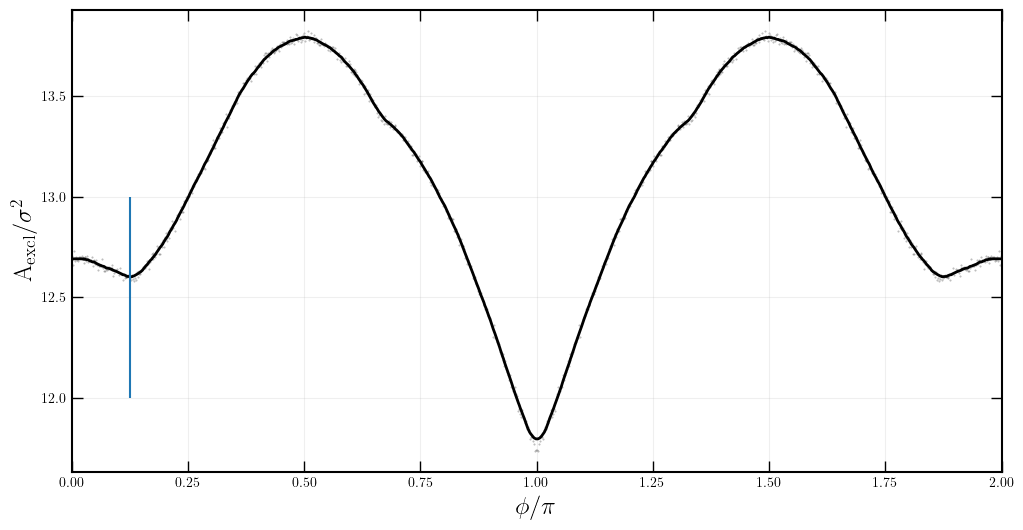

In [371]:
plt.figure(figsize = (12,6))
computed_area = arr/shots*(L**2)
computed_area_extended = arr_extended/shots*(L**2)
x = np.linspace(0,2, num_angles*2)

window_size = 20
rmean = pd.Series(computed_area_extended).rolling(window=window_size, center=True).mean().to_numpy()

plt.scatter(x, computed_area, color='k', s=0.2, alpha=0.3)
plt.plot(x, rmean[20:-20], color='k', lw = 2)
plt.xlim(0, 2)
# plt.ylim(np.min(computed_area), np.max(computed_area))

plt.xlabel("$\\phi/\\pi$", fontsize = 18)
plt.ylabel("$\\rm A_{\\rm excl}/\\sigma^2$", fontsize = 18)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.tick_params('both', size = 8, width = 1, direction = 'in' )
ax.tick_params(bottom=True, top=True, left=True, right=True, direction='in')
plt.grid('true', alpha = 0.2)

# plt.savefig("/Users/leo/Desktop/MD_figs/thermalarea_2pi3.png", dpi = 1200)
plt.show()

In [367]:
#### SAVE DATA
np.save('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_2pi3.npy',computed_area)
np.save('/Users/leo/C++/MolecularDynamics/2dLW/scaled_particle_theory/A_excl/thermal_area_rollingmean_2pi3.npy', rmean[20:-20])
